In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indic-tts-deepfake-challenge/sample.csv


In [2]:
from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("SherryT997/IndicTTS-Deepfake-Challenge-Data")


README.md:   0%|          | 0.00/2.81k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/35 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/35 [00:00<?, ?it/s]

train-00000-of-00035.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00001-of-00035.parquet:   0%|          | 0.00/461M [00:00<?, ?B/s]

train-00002-of-00035.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00003-of-00035.parquet:   0%|          | 0.00/443M [00:00<?, ?B/s]

train-00004-of-00035.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

train-00005-of-00035.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00006-of-00035.parquet:   0%|          | 0.00/447M [00:00<?, ?B/s]

train-00007-of-00035.parquet:   0%|          | 0.00/516M [00:00<?, ?B/s]

train-00008-of-00035.parquet:   0%|          | 0.00/557M [00:00<?, ?B/s]

train-00009-of-00035.parquet:   0%|          | 0.00/521M [00:00<?, ?B/s]

train-00010-of-00035.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00011-of-00035.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

train-00012-of-00035.parquet:   0%|          | 0.00/414M [00:00<?, ?B/s]

train-00013-of-00035.parquet:   0%|          | 0.00/473M [00:00<?, ?B/s]

train-00014-of-00035.parquet:   0%|          | 0.00/481M [00:00<?, ?B/s]

train-00015-of-00035.parquet:   0%|          | 0.00/467M [00:00<?, ?B/s]

train-00016-of-00035.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

train-00017-of-00035.parquet:   0%|          | 0.00/510M [00:00<?, ?B/s]

train-00018-of-00035.parquet:   0%|          | 0.00/471M [00:00<?, ?B/s]

train-00019-of-00035.parquet:   0%|          | 0.00/501M [00:00<?, ?B/s]

train-00020-of-00035.parquet:   0%|          | 0.00/559M [00:00<?, ?B/s]

train-00021-of-00035.parquet:   0%|          | 0.00/541M [00:00<?, ?B/s]

train-00022-of-00035.parquet:   0%|          | 0.00/558M [00:00<?, ?B/s]

train-00023-of-00035.parquet:   0%|          | 0.00/599M [00:00<?, ?B/s]

train-00024-of-00035.parquet:   0%|          | 0.00/576M [00:00<?, ?B/s]

train-00025-of-00035.parquet:   0%|          | 0.00/547M [00:00<?, ?B/s]

train-00026-of-00035.parquet:   0%|          | 0.00/537M [00:00<?, ?B/s]

train-00027-of-00035.parquet:   0%|          | 0.00/421M [00:00<?, ?B/s]

train-00028-of-00035.parquet:   0%|          | 0.00/382M [00:00<?, ?B/s]

train-00029-of-00035.parquet:   0%|          | 0.00/287M [00:00<?, ?B/s]

train-00030-of-00035.parquet:   0%|          | 0.00/282M [00:00<?, ?B/s]

train-00031-of-00035.parquet:   0%|          | 0.00/688M [00:00<?, ?B/s]

train-00032-of-00035.parquet:   0%|          | 0.00/613M [00:00<?, ?B/s]

train-00033-of-00035.parquet:   0%|          | 0.00/309M [00:00<?, ?B/s]

train-00034-of-00035.parquet:   0%|          | 0.00/424M [00:00<?, ?B/s]

test-00000-of-00004.parquet:   0%|          | 0.00/356M [00:00<?, ?B/s]

test-00001-of-00004.parquet:   0%|          | 0.00/364M [00:00<?, ?B/s]

test-00002-of-00004.parquet:   0%|          | 0.00/410M [00:00<?, ?B/s]

test-00003-of-00004.parquet:   0%|          | 0.00/291M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/31102 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2635 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/35 [00:00<?, ?it/s]

In [3]:
import random
# train_data = dataset["train"]
random.seed(42)

# Get a random subset of 10,000 samples
train_data = dataset["train"].select(random.sample(range(len(dataset["train"])), 10000))
# .select(range(10000))
test_data = dataset["test"] 

In [4]:
train_data

Dataset({
    features: ['text', 'id', 'language', 'is_tts', 'audio'],
    num_rows: 10000
})

In [5]:
test_data

Dataset({
    features: ['text', 'id', 'language', 'is_tts', 'audio'],
    num_rows: 2635
})

In [6]:
import librosa
import librosa.display
import numpy as np
from tqdm.auto import tqdm

def extract_mel_spectrogram(audio_array, sr=16000, n_fft=512, n_mels=128):
    """Extract Mel Spectrogram and handle short signals"""
    if len(audio_array) < n_fft:
        pad_width = n_fft - len(audio_array)
        audio_array = np.pad(audio_array, (0, pad_width))  # Pad with zeros
    
    mel_spec = librosa.feature.melspectrogram(y=audio_array, sr=sr, n_fft=n_fft, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

# Process dataset
train_mel_specs = []
train_labels = []

for sample in tqdm(train_data, desc="Extracting Mel Spectrograms"):
    mel_spec = extract_mel_spectrogram(sample["audio"]["array"])
    
    # Ensure consistent shape by padding or truncating
    target_shape = (128, 128)
    mel_spec_resized = librosa.util.fix_length(mel_spec, size=target_shape[1], axis=1)
    
    train_mel_specs.append(mel_spec_resized)
    train_labels.append(sample["is_tts"])

# Convert to NumPy arrays
X_train = np.array(train_mel_specs)
y_train = np.array(train_labels)

print("Final Shape:", X_train.shape)  # Should be (num_samples, 128, 128)


Extracting Mel Spectrograms:   0%|          | 0/10000 [00:00<?, ?it/s]

Final Shape: (10000, 128, 128)


In [7]:
# Process dataset
test_mel_specs = []
test_labels = []

for sample in tqdm(test_data, desc="Extracting Mel Spectrograms"):
    mel_spec = extract_mel_spectrogram(sample["audio"]["array"])
    
    # Ensure consistent shape by padding or truncating
    target_shape = (128, 128)
    mel_spec_resized = librosa.util.fix_length(mel_spec, size=target_shape[1], axis=1)
    
    test_mel_specs.append(mel_spec_resized)
    test_labels.append(sample["is_tts"])


X_test = np.array(test_mel_specs)
y_test = np.array(test_labels)

print("Final Shape:", X_test.shape)  # Should be (num_samples, 128, 128)

Extracting Mel Spectrograms:   0%|          | 0/2635 [00:00<?, ?it/s]

Final Shape: (2635, 128, 128)


In [8]:
import cv2

# Resize function
def resize_mel_spectrogram(mel_spec, target_size=(128, 128)):
    return cv2.resize(mel_spec, target_size, interpolation=cv2.INTER_CUBIC)

# Apply resizing
X_train_resized = np.array([resize_mel_spectrogram(m) for m in X_train])
X_test_resized = np.array([resize_mel_spectrogram(m) for m in X_test])
# Normalize (convert values to [0,1])
X_train_normalized = X_train_resized / np.max(X_train_resized)
X_test_normalized = X_test_resized / np.max(X_test_resized)

In [9]:
X_train_final = X_train_normalized[..., np.newaxis]  # Add channel dimension (grayscale)
print(X_train_final.shape)  # Expected: (num_samples, 128, 128, 1)
X_test_final = X_test_normalized[..., np.newaxis]  # Add channel dimension (grayscale)
print(X_test_final.shape) 

(10000, 128, 128, 1)
(2635, 128, 128, 1)


In [10]:
import torch
torch.manual_seed(91)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.auto import tqdm
import numpy as np

# ✅ Input shape for CNN (128x128 grayscale images, 1 channel)
input_shape = (128, 128, 1)  

# ✅ Build CNN Model
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten before passing to Dense layers
    Flatten(),

    # Fully Connected Layers
    Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.1),  # Increased dropout

    Dense(32, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.1),

    Dense(16, activation='relu', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.1),

    # Output Layer with Sigmoid Activation for Binary Classification
    Dense(1, activation='sigmoid')
])

# ✅ Compile Model with Adam Optimizer
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Lower LR
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name="auc")]
)

# ✅ Reshape and Normalize Data for CNN
X_train_cnn = X_train_final.reshape(X_train_final.shape[0], 128, 128, 1) / 255.0  # Normalize between 0-1
X_test_cnn = X_test_final.reshape(X_test_final.shape[0], 128, 128, 1) / 255.0  # Normalize test data

# ✅ Early Stopping to Prevent Overfitting
early_stopping = EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True, mode='max')

# ✅ Train with tqdm progress bar
epochs = 8  # More epochs (stopped early if needed)
batch_size = 8
steps_per_epoch = len(X_train_cnn) // batch_size

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    with tqdm(total=steps_per_epoch, desc="Training Progress", unit="batch") as pbar:
        history = model.fit(
            X_train_cnn, y_train,
            epochs=1, batch_size=batch_size, validation_split=0.2,
            verbose=0,  # Suppress default output
            callbacks=[early_stopping]  # Stop if overfitting
        )
        pbar.update(steps_per_epoch)  # Update tqdm bar

    # ✅ Print AUC score
    auc_score = history.history['auc'][-1]
    val_auc_score = history.history['val_auc'][-1]
    print(f"AUC: {auc_score:.4f}, Val AUC: {val_auc_score:.4f}")

    # ✅ Stop manually if val AUC drops
    if epoch > 5 and len(history.history['val_auc']) > 1 and val_auc_score < history.history['val_auc'][-2]:
        print("Validation AUC decreased. Stopping early.")
        break

print("Training Complete!")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1/8


Training Progress:   0%|          | 0/1250 [00:00<?, ?batch/s]

AUC: 0.6250, Val AUC: 0.7060

Epoch 2/8


Training Progress:   0%|          | 0/1250 [00:00<?, ?batch/s]

AUC: 0.8384, Val AUC: 0.9483

Epoch 3/8


Training Progress:   0%|          | 0/1250 [00:00<?, ?batch/s]

AUC: 0.9317, Val AUC: 0.9789

Epoch 4/8


Training Progress:   0%|          | 0/1250 [00:00<?, ?batch/s]

AUC: 0.9658, Val AUC: 0.9774

Epoch 5/8


Training Progress:   0%|          | 0/1250 [00:00<?, ?batch/s]

AUC: 0.9736, Val AUC: 0.9914

Epoch 6/8


Training Progress:   0%|          | 0/1250 [00:00<?, ?batch/s]

AUC: 0.9749, Val AUC: 0.7793

Epoch 7/8


Training Progress:   0%|          | 0/1250 [00:00<?, ?batch/s]

AUC: 0.9775, Val AUC: 0.9949

Epoch 8/8


Training Progress:   0%|          | 0/1250 [00:00<?, ?batch/s]

AUC: 0.9824, Val AUC: 0.9955
Training Complete!


In [12]:
# ✅ Get Predictions & Check Distribution
test_preds = model.predict(X_test_cnn)

print("Min prediction:", np.min(test_preds))
print("Max prediction:", np.max(test_preds))
print("Mean prediction:", np.mean(test_preds))


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Min prediction: 0.000117371965
Max prediction: 1.0
Mean prediction: 0.6657073


In [13]:
test_preds

array([[0.48240066],
       [0.99823916],
       [0.9830959 ],
       ...,
       [0.08822738],
       [0.7326583 ],
       [0.99501   ]], dtype=float32)

In [14]:
test_ids = [sample["id"] for sample in test_data]
submission = pd.DataFrame({"id": test_ids, "is_tts": test_preds.flatten()})
submission.to_csv("submission.csv", index=False)

In [15]:
submission.describe()

,is_tts
count,2635.000000
mean,0.665707
std,0.396946
min,0.000117
25%,0.217770
50%,0.958335
75%,0.997433
max,1.000000


In [16]:
submission

,id,is_tts
0,ASM_F_ANGER_00109,0.482401
1,ASM_F_ANGER_00127,0.998239
2,ASM_F_ANGER_00386,0.983096
3,ASM_F_ANGER_00103,0.972416
4,ASM_F_ANGER_00434,0.755397
...,...,...
2630,TAM_F_SURPRISE_00387,0.999995
2631,TAM_F_SURPRISE_00173,0.995801
2632,TAM_F_SURPRISE_00718,0.088227
2633,TAM_F_SURPRISE_00127,0.732658


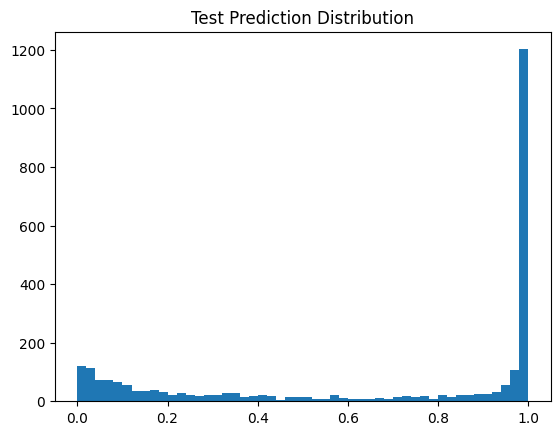

In [17]:
import matplotlib.pyplot as plt

plt.hist(submission['is_tts'], bins=50)
plt.title("Test Prediction Distribution")
plt.show()
